In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("House Price Prediction Dataset.csv")

In [58]:
df.sample(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
946,947,4650,2,4,2,1923,Rural,Fair,Yes,928836
436,437,4992,5,2,2,1928,Downtown,Good,No,810006
616,617,2680,5,1,2,1976,Suburban,Fair,No,459909
1029,1030,4763,2,3,1,2010,Downtown,Poor,No,840555
489,490,4686,3,1,2,2017,Suburban,Fair,Yes,431965


In [59]:
# getting info about data, trying to collect domain knowledge
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [60]:
df.count()

Id           2000
Area         2000
Bedrooms     2000
Bathrooms    2000
Floors       2000
YearBuilt    2000
Location     2000
Condition    2000
Garage       2000
Price        2000
dtype: int64

In [61]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [62]:
# find null values
df.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [63]:
df.isnull().sum().sum()

0

In [64]:
df[df.isnull().any(axis=1)]

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


# Remove Id : Unnecessary field

In [65]:
df.drop('Id', axis=1, inplace=True)

In [66]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [74]:
df['Price'].min()

50005

# Data Visualization

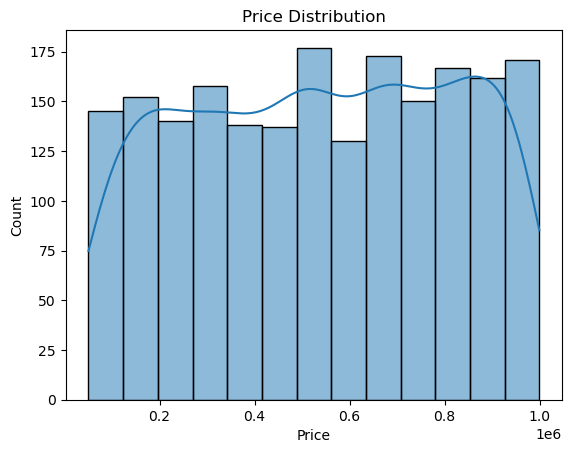

In [71]:
# Data visualization
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# How to Read It:
# X-axis = Price (divided into bins like 100k–200k, 200k–300k...)
# Y-axis = How many houses fall in that price range

# 📈 Why it’s useful:
# Helps detect skewed data
# Guides transformation decisions (e.g., apply log scale)
# Tells you if outliers will affect the model

# Numeric Features vs Price (Scatter/Line)

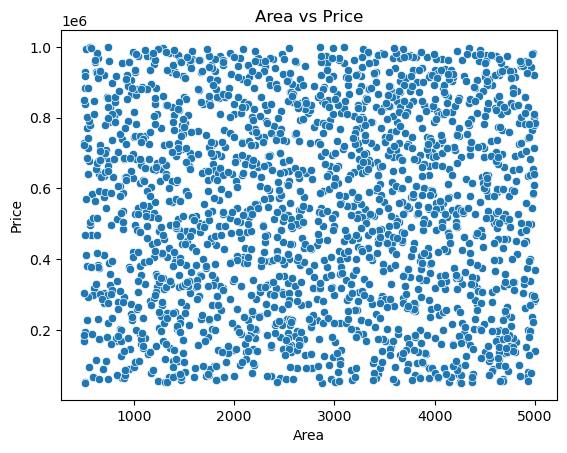

In [72]:
sns.scatterplot(x='Area', y='Price', data=df)
plt.title("Area vs Price")
plt.show()

# X-axis (Area) → How big the house is (in square feet)
# Y-axis (Price) → How expensive the house is

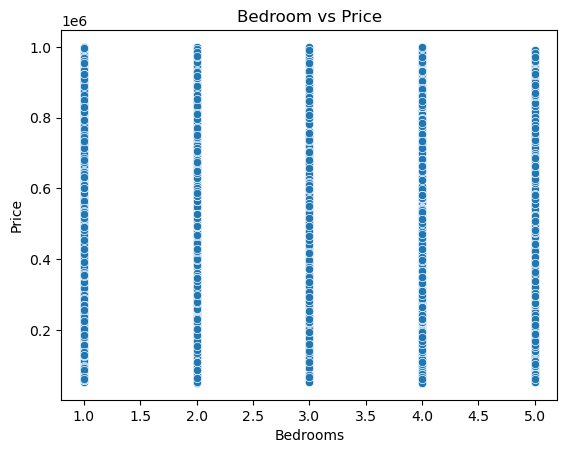

In [76]:
sns.scatterplot(x='Bedrooms', y='Price', data= df)
plt.title("Bedroom vs Price")
plt.show()

<Axes: xlabel='Bathrooms', ylabel='Price'>

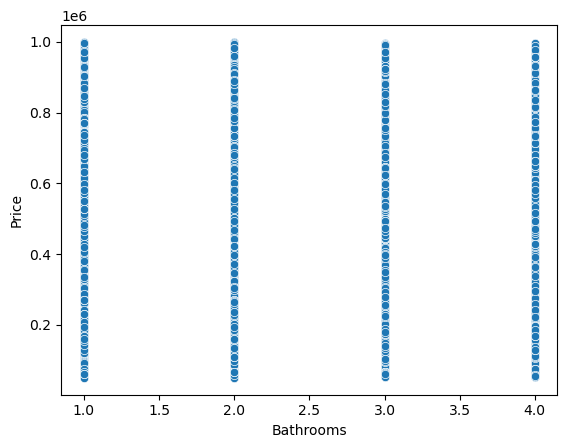

In [78]:
sns.scatterplot(x='Bathrooms', y='Price', data=df)

<Axes: xlabel='Floors', ylabel='Price'>

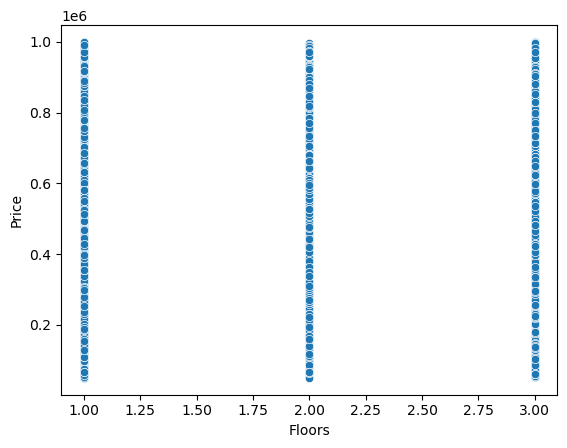

In [79]:
sns.scatterplot(x='Floors', y='Price', data=df)

<Axes: xlabel='YearBuilt', ylabel='Price'>

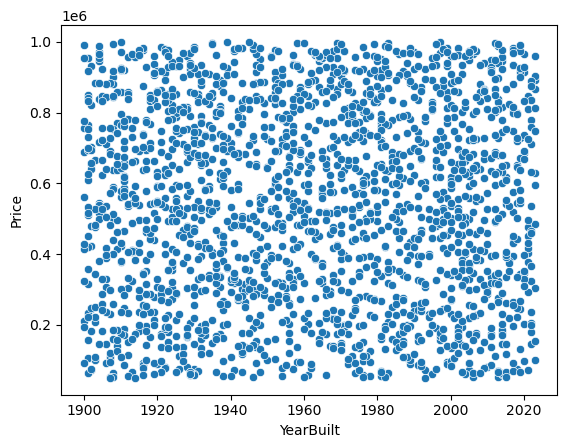

In [80]:
sns.scatterplot(x='YearBuilt', y='Price', data=df)

# 3. Categorical vs Price (Boxplot or Barplot)

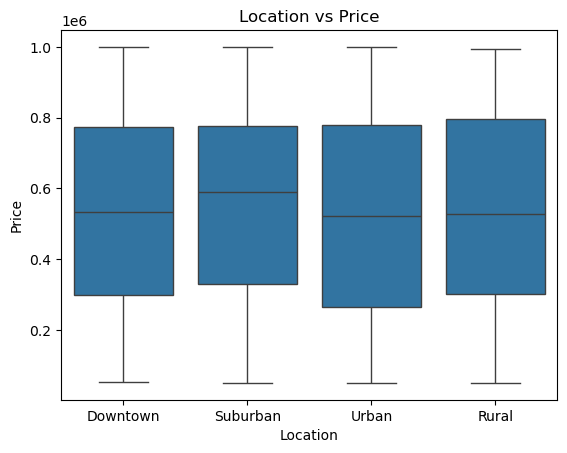

In [87]:
sns.boxplot(x='Location', y='Price', data=df)
plt.title("Location vs Price")
plt.show()

<Axes: xlabel='Condition', ylabel='Price'>

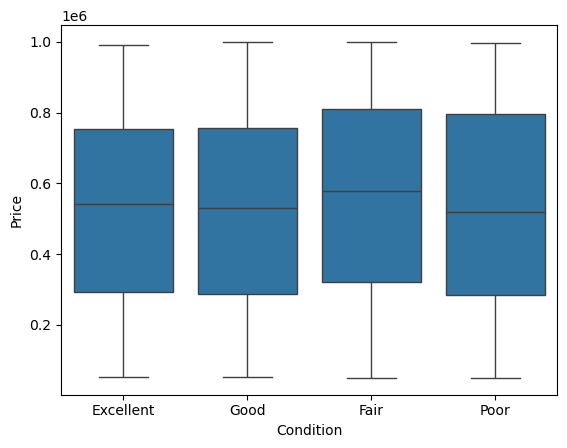

In [88]:
sns.boxplot(x='Condition', y='Price', data=df)

<Axes: xlabel='Garage', ylabel='Price'>

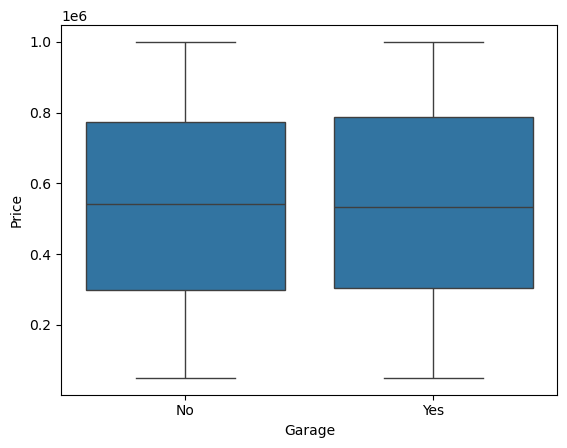

In [89]:
sns.boxplot(x='Garage', y='Price', data=df)

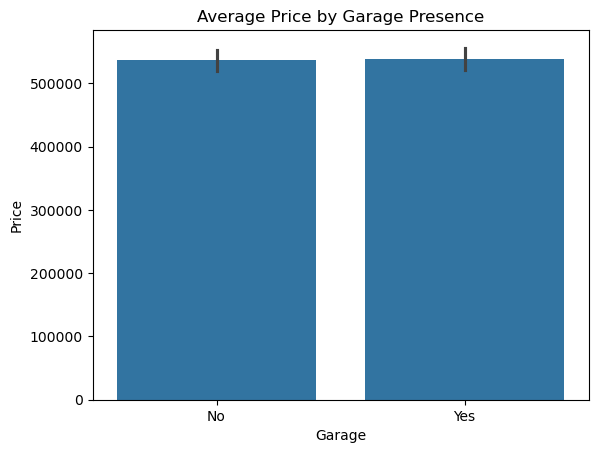

In [90]:
sns.barplot(x='Garage', y='Price', data=df)
plt.title("Average Price by Garage Presence")
plt.show()


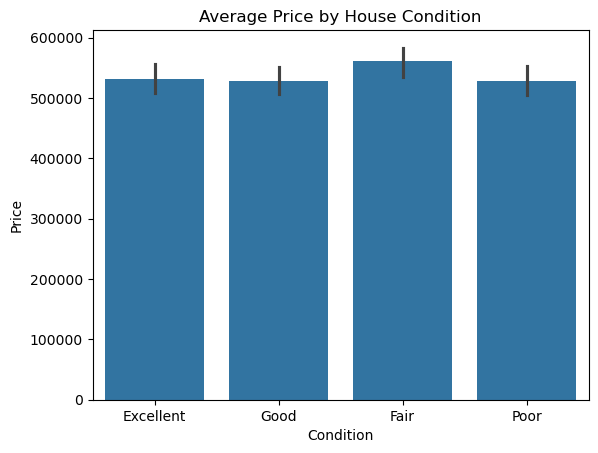

In [91]:
sns.barplot(x='Condition', y='Price', data=df)
plt.title("Average Price by House Condition")
plt.show()


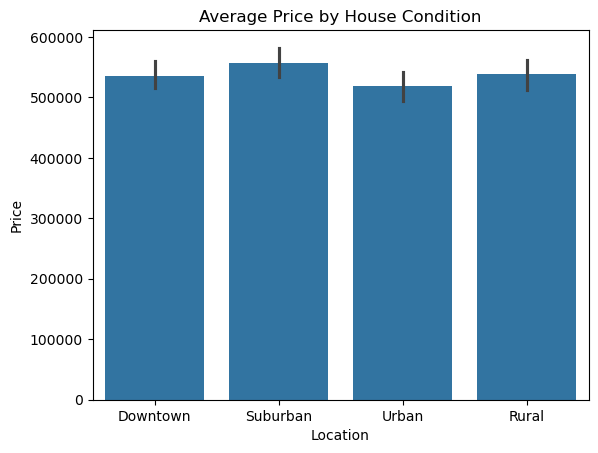

In [92]:
sns.barplot(x='Location', y='Price', data=df)
plt.title("Average Price by House Condition")
plt.show()

In [97]:
df.corr(numeric_only=True)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
Area,1.000000,0.047523,0.021881,0.017749,-0.011609,0.001542
Bedrooms,0.047523,1.000000,-0.011990,0.010435,-0.014125,-0.003471
Bathrooms,0.021881,-0.011990,1.000000,0.029089,-0.000839,-0.015737
Floors,0.017749,0.010435,0.029089,1.000000,-0.006474,0.055890
YearBuilt,-0.011609,-0.014125,-0.000839,-0.006474,1.000000,0.004845
Price,0.001542,-0.003471,-0.015737,0.055890,0.004845,1.000000


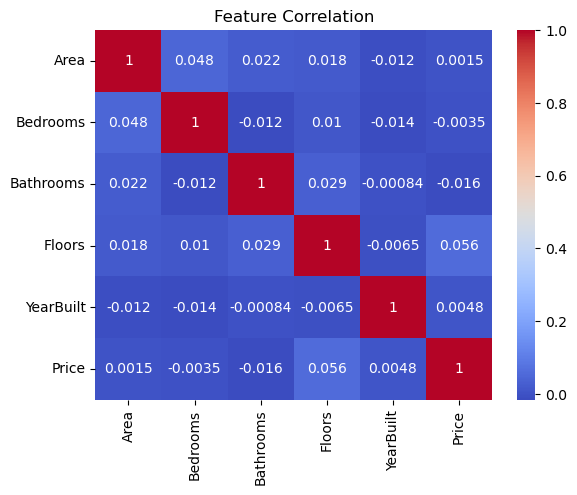

In [99]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [100]:
print(df['Location'].unique())
print(df['Condition'].unique())
print(df['Garage'].unique())

['Downtown' 'Suburban' 'Urban' 'Rural']
['Excellent' 'Good' 'Fair' 'Poor']
['No' 'Yes']


In [101]:
# “How do I turn text into numbers?”

# Label Encoding	for Ordinal (ranked) categories
# One-Hot Encoding	For nominal (unordered) categories — most common

In [102]:
# print(df['Location'].value_counts)
print(df['Location'].value_counts())
print(df['Condition'].value_counts())
print(df['Garage'].value_counts())

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64
Condition
Fair         521
Excellent    511
Poor         507
Good         461
Name: count, dtype: int64
Garage
No     1038
Yes     962
Name: count, dtype: int64


# One Hot Encoding

In [103]:
df = pd.get_dummies(df, columns=['Location', 'Condition'], drop_first=True)

In [104]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1360,5,4,3,1970,No,149919,False,False,False,False,False,False
1,4272,5,4,3,1958,No,424998,False,False,False,False,False,False
2,3592,2,2,3,1938,No,266746,False,False,False,False,True,False
3,966,4,2,2,1902,Yes,244020,False,True,False,True,False,False
4,4926,1,4,2,1975,Yes,636056,False,False,False,True,False,False


In [105]:
print(df.dtypes)

Area                  int64
Bedrooms              int64
Bathrooms             int64
Floors                int64
YearBuilt             int64
Garage               object
Price                 int64
Location_Rural         bool
Location_Suburban      bool
Location_Urban         bool
Condition_Fair         bool
Condition_Good         bool
Condition_Poor         bool
dtype: object


In [106]:
 # Convert All Boolean Columns to Integers 
bool_cols = df.select_dtypes(include='bool').columns
bool_cols

Index(['Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Condition_Fair', 'Condition_Good', 'Condition_Poor'],
      dtype='object')

In [107]:
df[bool_cols] = df[bool_cols].astype(int)

In [108]:
# df.head()
df.dtypes

Area                  int64
Bedrooms              int64
Bathrooms             int64
Floors                int64
YearBuilt             int64
Garage               object
Price                 int64
Location_Rural        int32
Location_Suburban     int32
Location_Urban        int32
Condition_Fair        int32
Condition_Good        int32
Condition_Poor        int32
dtype: object

# Binary Encode Garage

In [109]:
# Convert Garage from 'Yes' / 'No' to 1 / 0
df['Garage'] = df['Garage'].map({'Yes' : 1, 'No' : 0})

In [110]:
df.head(1)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1360,5,4,3,1970,0,149919,0,0,0,0,0,0


In [112]:
# df.corr()

# Feature Scaling (Preprocessing Step 2)

# standardization

In [114]:
from sklearn.preprocessing import StandardScaler

# Step 1: Separate X and y
X = df.drop('Price', axis=1)
y = df['Price']

In [116]:
y

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64

In [117]:
# Step 2: Initialize scaler

scaler = StandardScaler()

In [118]:
# Step 3: Fit and transform X
# This transforms your features to have mean = 0 and std = 1 (standardization)

X_scaled = scaler.fit_transform(X)

In [125]:
print(len(X_scaled))
print(X_scaled[0])

2000
[-1.10147065  1.40179052  1.30556821  1.24415065  0.23815548 -0.96269532
 -0.55732934 -0.56426196 -0.5658021  -0.5935192  -0.54730719 -0.58273899]


In [123]:
# X

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor
0,1360,5,4,3,1970,0,0,0,0,0,0,0
1,4272,5,4,3,1958,0,0,0,0,0,0,0
2,3592,2,2,3,1938,0,0,0,0,0,1,0
3,966,4,2,2,1902,1,0,1,0,1,0,0
4,4926,1,4,2,1975,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,0,0,1,0,0,0,1
1996,3046,5,2,1,2019,1,0,1,0,0,0,1
1997,1062,5,1,2,1903,0,1,0,0,0,0,1
1998,4062,3,1,2,1936,1,0,0,1,0,0,0


In [126]:
# Option B: Selective Scaling (More precise)

# # Separate numerical and categorical columns
# num_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
# cat_cols = [col for col in X.columns if col not in num_cols]

# # Scale only numeric columns
# X_scaled_num = scaler.fit_transform(X[num_cols])

# # Keep categorical as-is
# X_final = np.concatenate([X_scaled_num, X[cat_cols].values], axis=1)


In [127]:
# 📌 2. Why Don’t We Scale y (Target Variable)?
# ✅ Because it depends on the model:
# Model Type	Scale y?	Why
# Linear Regression	❌ Not required	Model handles any scale
# Tree models (e.g., Random Forest)	❌ Never needed	Trees split based on value, not scale
# Neural Networks	✅ Yes	Helps with stable training
# Gradient-based models	✅ Sometimes	Scaling improves convergence

In [128]:

# 🧠 When to Use Normalization?
# Use Normalization (Min-Max Scaling) when:

# You're using distance-based models: KNN, SVM, Neural Networks

# Your data must be bounded (like in images or sensors)

# You’re dealing with features that don’t follow a Gaussian distribution

# Use Standardization when:

# You're using linear models, logistic regression, tree-based models (Random Forest, XGBoost), etc.

# Your features are normally distributed or widely varying


# So, Do You Need Normalization Here?
# You are working on housing price prediction and likely using Linear Regression or Random Forest.

# ❌ No, you don’t need normalization here.
# ✅ StandardScaler is enough.

# Train-Test Split

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# test_size=0.2: 20% for testing
# random_state=42: ensures the same split every time (reproducibility)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 12)
(400, 12)
(1600,)
(400,)


#  Train a Linear Regression Model

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

LinearRegression()

# Make Predictions

In [133]:
# Predict prices for test set

y_pred = model.predict(X_test)

In [138]:
# predicted value

y_pred[0:10]

array([521988.22189839, 549119.31196651, 487101.22235594, 539752.7439933 ,
       553242.24872512, 521375.92025826, 523320.18080583, 578133.64353335,
       545899.64738458, 577368.69940644])

In [139]:
# pandas series it comes with index values
# original values

y_test[0:10]

1860    514764
353     694256
1333     66375
905     650243
1289    223285
1273    468127
938     513002
1731    911525
65      723265
1323    339416
Name: Price, dtype: int64

#  Evaluate the Model

In [141]:
# MSE	Avg. squared error between predicted and actual prices	Lower = better
# R² Score	% of variance explained by the model	Closer to 1 = better

In [142]:
from sklearn.metrics import mean_absolute_error, r2_score

mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mean score error :",mse)
print("r2 score", r2)

mean score error : 243241.97758826384
r2 score -0.006717808430749761


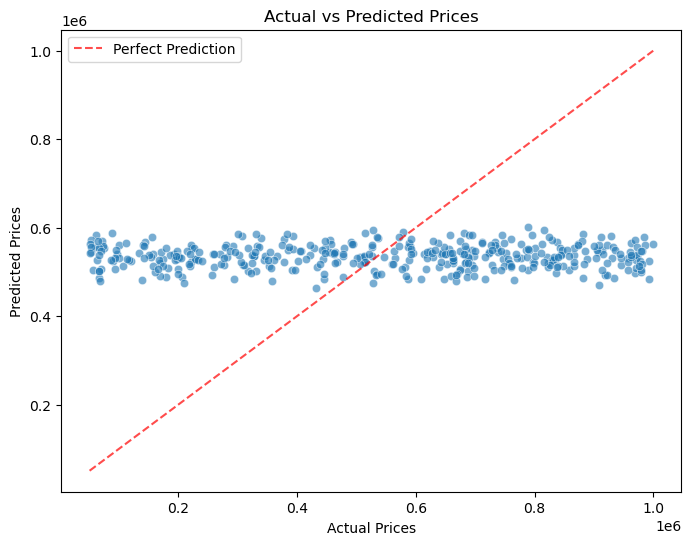

In [145]:
df_compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

plt.figure(figsize=(8, 6))

# Scatter plot with transparency and smaller points
sns.scatterplot(x='Actual', y='Predicted', data=df_compare, alpha=0.6)


# Plot perfect prediction line
lims = [df_compare.min().min(), df_compare.max().max()]
plt.plot(lims, lims, 'r--', alpha=0.7, label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

In [146]:
# the problem is
# actuall data in horizontal
# model draw(predict) linear line
# that's why we get higher error

### What’s happening:

* The **actual prices** are all over the place (scattered horizontally).
* Your **linear regression model** fits a single straight line through the data trying to minimize squared errors.
* If the relationship between features and target is **not linear** (or complex), the model can’t capture it well.
* So predictions tend to cluster around the line, missing many actual values, causing **high error** and **low R²**.

---

### This is a classic sign that:

* Your problem is **non-linear** or requires more complex modeling.
* Linear regression can be too simple for this.

---

### What to try next?

* Use **non-linear models** like:

  * **Random Forest Regressor**
  * **Gradient Boosting Machines (XGBoost, LightGBM)**
  * **Neural Networks**

* Or, **engineer new features**:

  * Polynomial features (`Area²`, `Bedrooms * Bathrooms`, etc.)
  * Log-transform target variable (`log(Price)`) to reduce skew